# ---- Dima's Milestone 3 Task 1[Revision]

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scripts import project_functions

df = project_functions.merge_data()
project_functions.process_data(df) # From Milestone 3 Task 3

# Task 4: Conduct an Exploratory Data Analysis (EDA) on your dataset (30%)

## Basic Data Information

We have 901315 rows of data and 17 different columns. No missing numerical values

#### Information about columns

In [2]:
# Let's explore the general information about the dataset and see what we have
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901315 entries, 450657 to 173868
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Longitude                                901280 non-null  Float64       
 1   Latitude                                 901280 non-null  Float64       
 2   Police_Force                             901315 non-null  Int64         
 3   Accident_Severity                        901315 non-null  Int64         
 4   Number_of_Vehicles                       901315 non-null  Int64         
 5   Number_of_Casualties                     901315 non-null  Int64         
 6   Date                                     901315 non-null  datetime64[ns]
 7   Day_of_Week                              901315 non-null  string        
 8   Time                                     901255 non-null  string        
 9   Road_Type            

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Type,Road_Surface_Conditions,Carriageway_Hazards,Police_Presense,Year
450657,-2.145169,57.173082,92,3,1,1,2005-11-21,Tuesday,21:45,Roundabout,40,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Other,Wet/Damp,None,True,2005
786063,-1.211784,54.679338,17,3,2,1,2005-04-19,Wednesday,01:35,Dual carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,True,2005
786062,-1.215392,54.685293,17,3,2,3,2005-04-15,Saturday,18:50,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,True,2005
786061,-1.235026,54.672297,17,3,2,1,2005-02-06,Monday,12:45,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,False,2005
786060,-1.22894,54.698861,17,3,2,1,2005-04-08,Saturday,13:15,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,True,2005


#### Information about duplicate entries
Seems like result shows 23201 duplicated entries, comparing that to the data dataset, we notice that out of 901315 rows, we have about 2% duplicates, I would say that's a good sign, as we have enough unique values to answer our questions.

In [3]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  23143
        Longitude   Latitude  Police_Force  Accident_Severity  \
287775  -4.820336   55.93954            97                  3   
287737  -4.820336   55.93954            97                  3   
41899   -3.594385  54.533175             3                  3   
18760   -3.594385  54.533175             3                  3   
42133   -3.593641  54.529949             3                  3   

        Number_of_Vehicles  Number_of_Casualties       Date Day_of_Week  \
287775                   2                     1 2011-09-16    Saturday   
287737                   2                     1 2011-09-16    Saturday   
41899                    2                     1 2012-01-13    Saturday   
18760                    2                     1 2012-01-13    Saturday   
42133                    2                     1 2012-06-26   Wednesday   

         Time           Road_Type  Speed_limit         Junction_Control  \
287775  17:20  Single carriageway           30  G

#### Observations from Statistical point
Interesting data to notice is police force presence, minimum is 1 unit, and maximum
is 98, seems a lit bit odd, since mean is roughly 27. Does it mean that this number is outlier or there was a major accident involved?
However, by checking the max number of vehicles involed in incident, it's possible 
to have 98 police force there.

In [4]:
df.describe()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Year
count,901280.000000,901280.000000,901315.000000,901315.000000,901315.000000,901315.000000,901315.000000,901315.000000
mean,-1.361466,52.546626,27.392350,2.863108,1.877528,1.331144,35.428075,2009.432804
std,1.342412,1.383365,24.806379,0.365861,0.602611,0.771135,11.308622,3.011951
min,-7.498973,49.914488,1.000000,1.000000,1.000000,1.000000,10.000000,2005.000000
25%,-2.245041,51.491166,5.000000,3.000000,2.000000,1.000000,30.000000,2006.000000
50%,-1.341753,52.269987,21.000000,3.000000,2.000000,1.000000,30.000000,2010.000000
75%,-0.191097,53.459997,44.000000,3.000000,2.000000,1.000000,30.000000,2012.000000
max,1.759398,60.662043,98.000000,3.000000,28.000000,87.000000,70.000000,2014.000000


#### Number of unique entries for each column

In [5]:
# Return Series with number of distinct observations.
df.nunique(axis = 0)

Longitude                                  610532
Latitude                                   581913
Police_Force                                   51
Accident_Severity                               3
Number_of_Vehicles                             15
Number_of_Casualties                           34
Date                                         3286
Day_of_Week                                     7
Time                                         1439
Road_Type                                       6
Speed_limit                                     8
Junction_Control                                4
Pedestrian_Crossing-Human_Control               3
Pedestrian_Crossing-Physical_Facilities         6
Light_Conditions                                5
Weather_Type                                    9
Road_Surface_Conditions                         5
Carriageway_Hazards                             6
Police_Presense                                 2
Year                                            9


#### Statistical comparision between years
Let's group all information by years, and see what is the mean value for each column as we have information for 9 years.


In [6]:
df.groupby('Year').mean()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Police_Presense
Year,,,,,,,,
2005,-1.426624,52.583475,28.142579,2.873107,1.888904,1.342221,36.044342,0.785886
2006,-1.423471,52.587279,28.498947,2.865824,1.88932,1.342993,36.01838,0.789686
2007,-1.432268,52.573971,28.651813,2.861707,1.88618,1.342186,36.009038,0.791621
2009,-1.387261,52.577015,28.016464,2.865105,1.879365,1.338777,35.435757,0.789634
2010,-1.348336,52.527694,27.64421,2.869607,1.872087,1.337255,35.322815,0.790919
2011,-1.317322,52.498867,27.761316,2.862094,1.869595,1.326292,35.174699,0.797431
2012,-1.34582,52.607394,23.091271,2.84935,1.86648,1.33126,34.701192,0.811717
2013,-1.275144,52.468848,27.788401,2.859061,1.867958,1.302772,35.05617,0.803986
2014,-1.248528,52.449106,27.267665,2.861655,1.872606,1.305993,34.835012,0.805119


#### Type of Road vs Number of casulties

What type of road causes casulties in the accident? Is there a correlation between type of road and how many casulties?

Exploring the results, it seems that the single carrigeway is a leader on the number of casulties by comparing to other types of road. This seems impressive, but what factors affect it, let's look into the time of the week and speed limit.

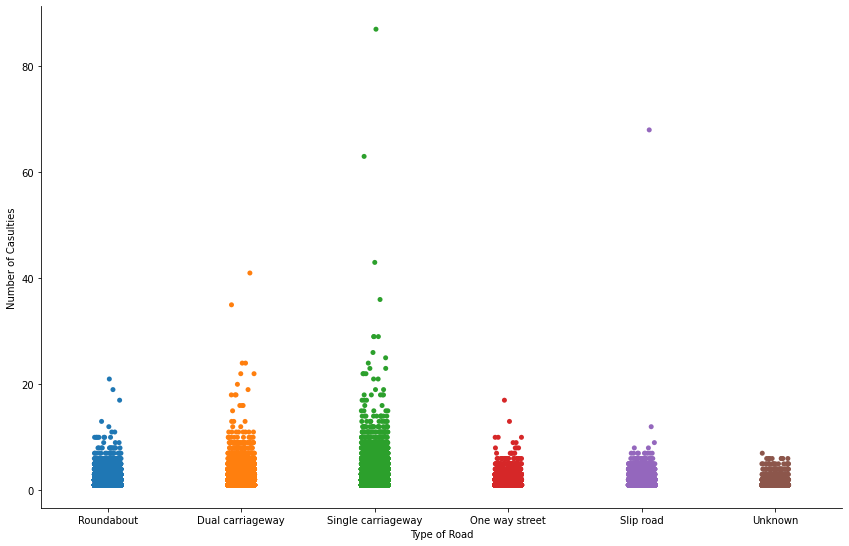

In [7]:
catplot = sns.catplot(data = df, y='Number_of_Casualties', x='Road_Type', height=7.5, aspect=11.7/7.5)

plt.ylabel("Number of Casulties")
plt.xlabel("Type of Road")
catplot

### Time of Week and Type of Road

By observing the data from the plot, we notice that most accidents with severity happen on single carriage way road, which makes sense as there is not much space for vehicles, hence, making it the most dangerous road in UK to drive.

[Text(0, 0.5, 'Number of accidents'), Text(0.5, 1.0, 'Accidents by Road Type')]

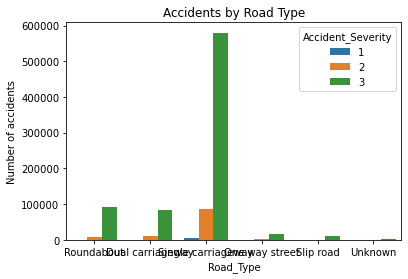

In [8]:
x = sns.countplot(x='Road_Type', data=df, hue='Accident_Severity')
x.set(ylabel='Number of accidents', title='Accidents by Road Type')

Observing the day of week, it semes that most of the data is distributed normally through the week, however, Saturday has the most number of accidents, meanwhile, Monday has lowest number of accidents comparing to other days.

[Text(0, 0.5, 'Number of accidents'),
 Text(0.5, 1.0, 'Accidents by day of week')]

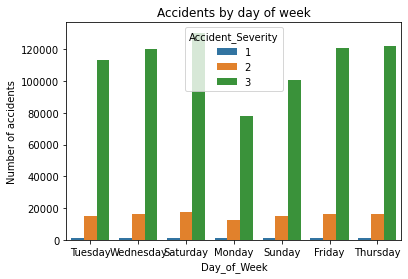

In [9]:
x = sns.countplot(x='Day_of_Week', data=df, hue='Accident_Severity')
x.set(ylabel='Number of accidents', title='Accidents by day of week')

### Vehicles involved in accident through years

Through different year, the data may vary as different conditions affect the situation on roads, so it's necessary to check if the data through years was different.

Looking at the scatterplot, seems that number of vechiles involved in accident doesn't change significantly, by looking to the previous tables with mean, the numbers are similar.

<AxesSubplot:xlabel='Year', ylabel='Number_of_Vehicles'>

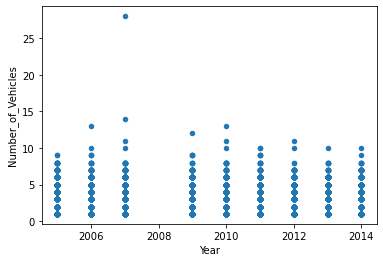

In [10]:
df.plot(kind='scatter', x='Year', y='Number_of_Vehicles')

Looking on the surface conditions on the roads, it seems odd that most of the accidents happen on the dry road. I expected more accidents to happen on snowy or frost roads. However, this is probably normal as people tend to drive more careful in winter.

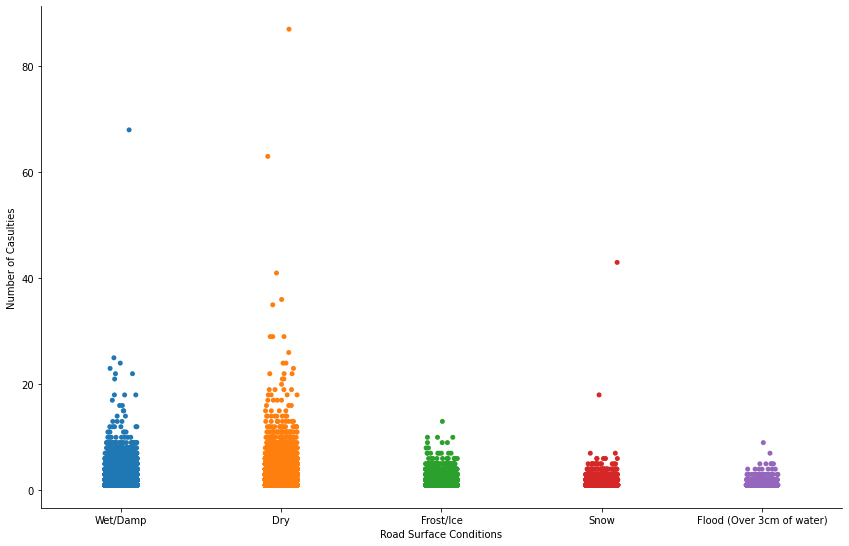

In [11]:
catplot = sns.catplot(data = df, y='Number_of_Casualties', x='Road_Surface_Conditions', height=7.5, aspect=11.7/7.5)

plt.ylabel("Number of Casulties")
plt.xlabel("Road Surface Conditions")
catplot

# ---- Conner's Milestone 3

# Task 4: EDA

In [12]:
import pandas_profiling as pdp
sns.set_theme(font_scale=1)

In [ ]:
df.profile_report() ## generate a profile report first to examine data

# Observations
- 77.4 % of accidents had only one casualty. 15.9% had two casualties. 4.3% had three casualties. 4 -> 1.5%, 5-> 0.5% 
- 22.5 % of accidents invloved a single car, 69.1% invloved 2 cars, and 7% of accidents involved 3 cars
- 0.1 % of accidents record "Involvment with previous accident" (570 total reports) 
- Can we graph lattatude/longitude?

Some Roadtype defentions:
1. A roads are major roads. B and C are minor roads either urban or rural which are maintained by a local authority
2. Cariageway is a highway
3. Slipway is a junction allowing a driver to change roads

[Text(0, 0.5, 'Number of Acidents (2005-2014)'),
 Text(0.5, 1.0, 'Accidents by Day of Week and Severity (1 is highest)')]

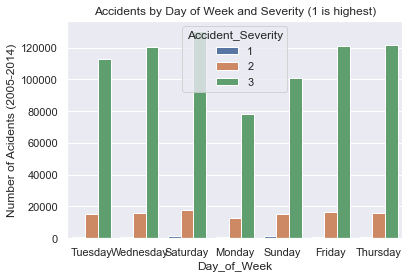

In [13]:
x = sns.countplot(x='Day_of_Week', data=df, hue='Accident_Severity')
x.set(ylabel='Number of Acidents (2005-2014)',title='Accidents by Day of Week and Severity (1 is highest)',)

Is saturday the most dangerous day to drive your car in the UK?

In [14]:
print('There was',df.sum()['Number_of_Casualties'],'casualties between 2005 and 2014 in The UK')

There was 1199780.0 casualties between 2005 and 2014 in The UK


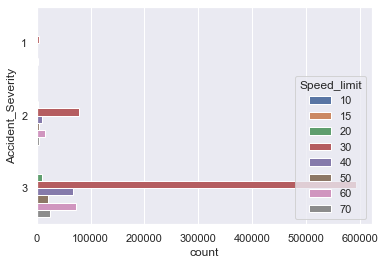

In [15]:
acident=sns.countplot(y='Accident_Severity', hue='Speed_limit',data=df)

No brilliant correlation between speed limit an accident severity. I would bet it is just due to most accidents being low severity (level 3)

<AxesSubplot:xlabel='Accident_Severity', ylabel='count'>

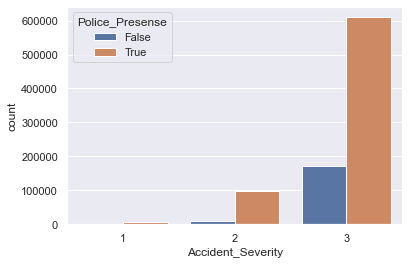

In [16]:
dfp = df.dropna() ## the Police_Presense has NA values

sns.countplot(x='Accident_Severity',hue='Police_Presense',data=dfp, )

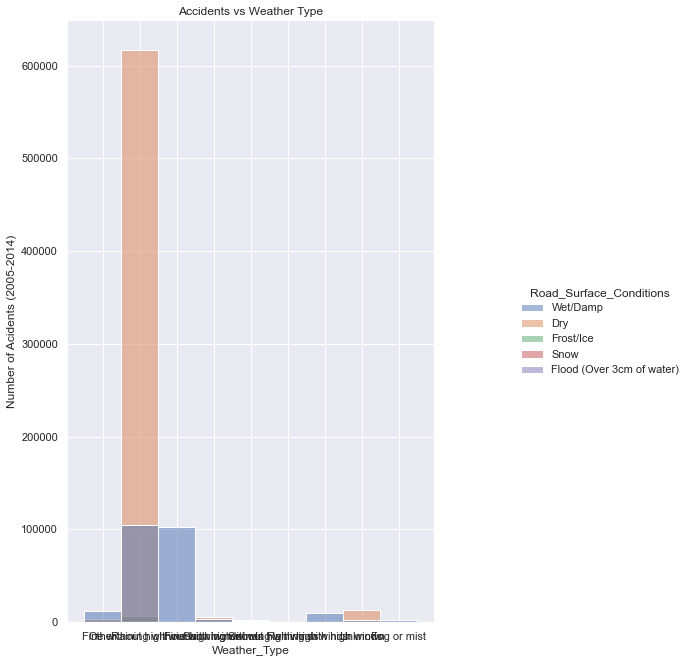

In [17]:
wvs=sns.displot(dfp,x='Weather_Type', hue ='Road_Surface_Conditions')
wvs.fig.set_size_inches(10,10)

wvs.set(ylabel='Number of Acidents (2005-2014)',title='Accidents vs Weather Type')

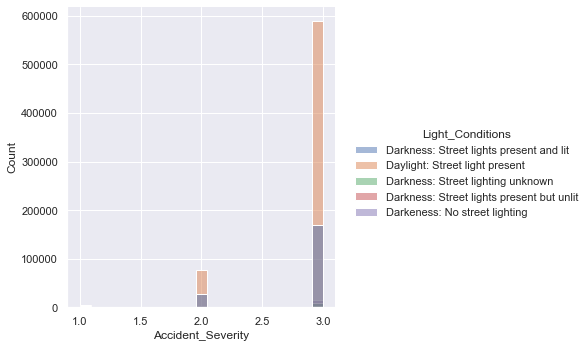

In [18]:
sns.displot(data=df,x='Accident_Severity',hue ='Light_Conditions' )

Is saturday the most dangerous day to drive your car in the UK?

# ---- Turner's Milestone 3

# Task 4: Exploratory Data Analysis
To begin my EDA I figured it would be best to develop a correlation matrix/heatmap to try and identify any correlation between numeric values in our dataset.

<AxesSubplot:>

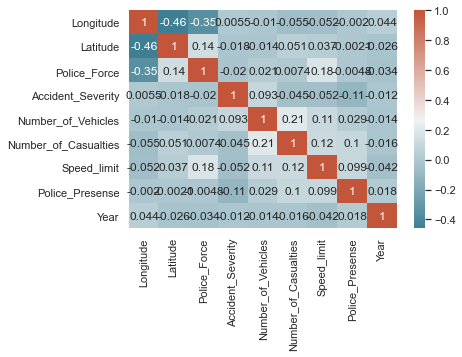

In [19]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

This data did very little to help me and the only numerical data that had any sort of small correlation was Number of Casualties and the Number of Vehicles. It would make sense that more vehicles would mean more casualties right? Let's take a look at this data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Number_of_Casualties', ylabel='Number_of_Vehicles'>

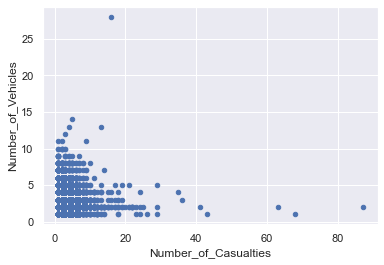

In [20]:
df.plot(kind='scatter', x='Number_of_Casualties', y='Number_of_Vehicles')

<img src="TurnerImages/CasualtiesvsVehicles.png" width="350" height="250">

hmmm. This data really doesn't tell us much about our dataset or help us answer the research questions. Perhaps we need to move onto other variables.

---

My next thought was that it would be interesting to see the frequency of accidents throughout the year and if there was more or less in different months of the year. I produced the following histogram of the year 2005. Interesting... it appears there is more accidents in the winter months of the year! Does this have to do with poorer weather conditions? Unfortunately a series of things prevented this graph from being a more powerful tool in our research.

1. My extreme lack of any COSC experience prior this course hindering me from producing a graph with every other year in our data

2.  the lack of time to troubleshoot for hours and find a solution

Even stack overflow couldnt help me with this one (perhaps as a future endevour, I can finalize this plot)

This could be useful when observing or research question:
>Does the time-of-day or the light conditions effect play a role in accident prevalence or severity?

This info could be a deeper look into the "time" portion of the question

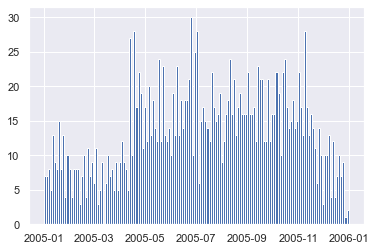

In [21]:
#histogram 
plt.hist(df[0:2000]["Date"], bins = 150)
plt.show()

---

Another idea I had was to observe some of the categorical values from our dataset. I decided it would be useful for our road surface research question to look at some road surface conditions. I decided to make a graph looking at the frequency of accidents on difficult road types under different conditions. Most accidents happened on the single carriageway (which is the most common road type in the UK), and suprisingly enough to me, most accidents happened under dry conditions. Under further examination this makes sense as there would be more instances where the road is dry compared to wet, so naturally more accidents would occur in the most common condition. Definetly interesting information to include in our Task 5. (Edit: One of my teammates had a better visualization compared to me that we decided to use for Task 5 instead)

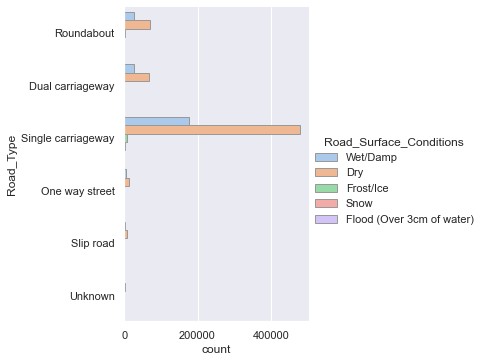

In [22]:
sns.catplot(y="Road_Type", hue="Road_Surface_Conditions", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

---

My curiosity peaked from my previous plot and made me wonder if the higher frequency of accidents that occured on single carriageways was also responsible for more casualties. The plot below demonstrates this point, displaying single carriageways as the most deadly road type, followed by dual carriageways and roundabouts. Unfortunately this data does not tie in as well to our original research questions we made in Milestone 1, but I think never the less it is interesting to see how many more casualties occur in single carriageway accidents.

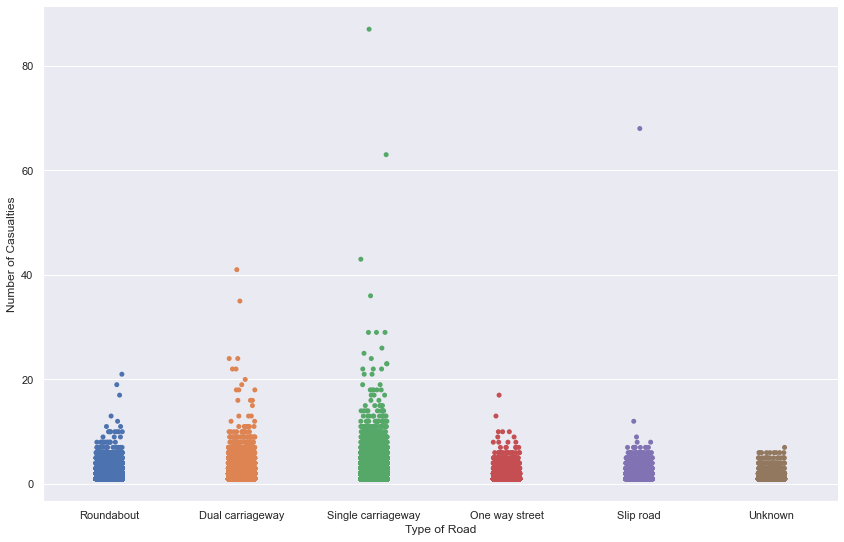

In [23]:
catplot = sns.catplot(data = df, y='Number_of_Casualties', x='Road_Type', height=7.5, aspect=11.7/7.5)

plt.ylabel("Number of Casualties")
plt.xlabel("Type of Road")
catplot

<img src="TurnerImages/RoadvsCasualties.png" width="600" height="400">

---